### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

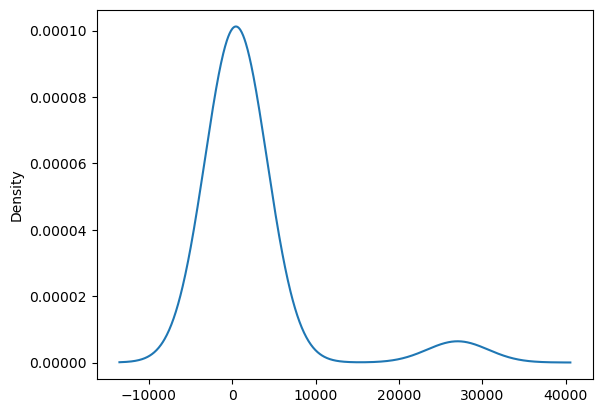

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_counts[app_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

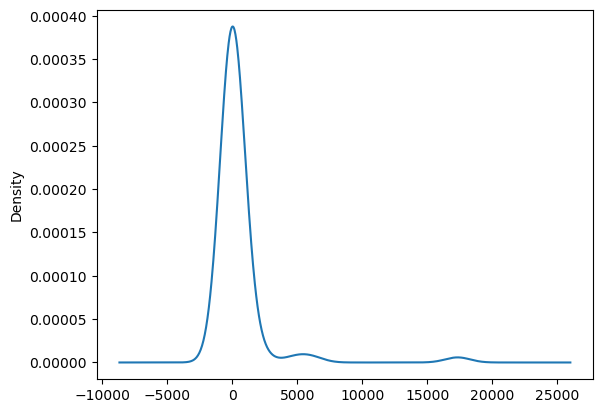

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [17]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
  1/804 [..............................] - ETA: 19:26 - loss: 2463.8293 - accuracy: 0.4375
Epoch 00001: saving model to checkpoints\weights.01.hdf5
  6/804 [..............................] - ETA: 11s - loss: 2049.5808 - accuracy: 0.5312  
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 13/804 [..............................] - ETA: 8s - loss: 2177.6040 - accuracy: 0.5409 
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 17/804 [..............................] - ETA: 8s - loss: 1862.9028 - accuracy: 0.5533
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 21/804 [..............................] - ETA: 8s - loss: 4184.7964 - accuracy: 0.5714
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 28/804 [>.............................] - ETA: 8s - loss: 3542.0505 - accuracy: 0.5569
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 32/804 [>.............................] - ETA: 8s - loss: 21802.8613 - accuracy: 0.5596
Epoch 00001: saving mod

316/804 [==========>...................] - ETA: 4s - loss: 21942.4727 - accuracy: 0.4941
Epoch 00001: saving model to checkpoints\weights.01.hdf5
321/804 [==========>...................] - ETA: 4s - loss: 23007.4512 - accuracy: 0.4946
Epoch 00001: saving model to checkpoints\weights.01.hdf5
326/804 [===========>..................] - ETA: 4s - loss: 24206.9316 - accuracy: 0.4952
Epoch 00001: saving model to checkpoints\weights.01.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 24271.3516 - accuracy: 0.4959
Epoch 00001: saving model to checkpoints\weights.01.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 27463.5156 - accuracy: 0.4955
Epoch 00001: saving model to checkpoints\weights.01.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 27107.5430 - accuracy: 0.4946
Epoch 00001: saving model to checkpoints\weights.01.hdf5
346/804 [===========>..................] - ETA: 4s - loss: 26822.0957 - accuracy: 0.4947
Epoch 00001: saving model to checkp

616/804 [=====================>........] - ETA: 1s - loss: 21194.0195 - accuracy: 0.4973
Epoch 00001: saving model to checkpoints\weights.01.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 21036.8711 - accuracy: 0.4974
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 20715.0664 - accuracy: 0.4978
Epoch 00001: saving model to checkpoints\weights.01.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 21439.5566 - accuracy: 0.4982
Epoch 00001: saving model to checkpoints\weights.01.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 21336.0352 - accuracy: 0.4979
Epoch 00001: saving model to checkpoints\weights.01.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 38105.2773 - accuracy: 0.4971
Epoch 00001: saving model to checkpoints\weights.01.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 70126.1

122/804 [===>..........................] - ETA: 6s - loss: 33762.7227 - accuracy: 0.4898
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
132/804 [===>..........................] - ETA: 6s - loss: 43817.7031 - accuracy: 0.4877
Epoch 00002: saving model to checkpoints\weights.02.hdf5
137/804 [====>.........................] - ETA: 6s - loss: 42282.2656 - accuracy: 0.4877
Epoch 00002: saving model to checkpoints\weights.02.hdf5
142/804 [====>.........................] - ETA: 6s - loss: 41339.3203 - accuracy: 0.4866
Epoch 00002: saving model to checkpoints\weights.02.hdf5
147/804 [====>.........................] - ETA: 6s - loss: 40158.5859 - accuracy: 0.4853
Epoch 00002: saving model to checkpoints\weights.02.hdf5
152/804 [====>.........................] - ETA: 6s - loss: 39100.1992 - accuracy: 0.4829
Epoch 00002: saving model to checkpoints\weights.02.hdf5
157/804 [====>.........................] - ETA: 6s - loss: 52650.6

432/804 [===============>..............] - ETA: 3s - loss: 63316.7969 - accuracy: 0.4884
Epoch 00002: saving model to checkpoints\weights.02.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 62355.6836 - accuracy: 0.4884
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 61490.0352 - accuracy: 0.4882
Epoch 00002: saving model to checkpoints\weights.02.hdf5
452/804 [===============>..............] - ETA: 3s - loss: 61171.7891 - accuracy: 0.4875
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
462/804 [================>.............] - ETA: 3s - loss: 59885.0547 - accuracy: 0.4879
Epoch 00002: saving model to checkpoints\weights.02.hdf5
467/804 [================>.............] - ETA: 3s - loss: 59285.4766 - accuracy: 0.4888
Epoch 00002: saving model to checkpoints\weights.02.hdf5
474/804 

752/804 [===========================>..] - ETA: 0s - loss: 53385.2539 - accuracy: 0.5013
Epoch 00002: saving model to checkpoints\weights.02.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 53084.4336 - accuracy: 0.5013
Epoch 00002: saving model to checkpoints\weights.02.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 53022.7656 - accuracy: 0.5011
Epoch 00002: saving model to checkpoints\weights.02.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 55545.0586 - accuracy: 0.5009
Epoch 00002: saving model to checkpoints\weights.02.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 55231.7969 - accuracy: 0.5006
Epoch 00002: saving model to checkpoints\weights.02.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 54920.2930 - accuracy: 0.5004
Epoch 00002: saving model to checkpoints\weights.02.hdf5
782/804 [============================>.] - ETA: 0s - loss: 54587.8945 - accuracy: 0.5001
Epoch 00002: saving model to checkp

253/804 [========>.....................] - ETA: 5s - loss: 10593.0156 - accuracy: 0.4723
Epoch 00003: saving model to checkpoints\weights.03.hdf5
259/804 [========>.....................] - ETA: 5s - loss: 10386.7021 - accuracy: 0.4730
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
268/804 [=========>....................] - ETA: 5s - loss: 10113.2314 - accuracy: 0.4746
Epoch 00003: saving model to checkpoints\weights.03.hdf5
273/804 [=========>....................] - ETA: 5s - loss: 9944.9248 - accuracy: 0.4763 
Epoch 00003: saving model to checkpoints\weights.03.hdf5
279/804 [=========>....................] - ETA: 5s - loss: 9781.4355 - accuracy: 0.4783
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
288/804 [=========>....................] - ETA: 5s - loss: 9538.9346 - accuracy: 0.4809
Epoch 00003: saving model to checkpoints\weights.03.hdf5
293/804 [=

558/804 [===================>..........] - ETA: 2s - loss: 53322.4258 - accuracy: 0.4996
Epoch 00003: saving model to checkpoints\weights.03.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 53398.8008 - accuracy: 0.5003
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 52717.8711 - accuracy: 0.5008
Epoch 00003: saving model to checkpoints\weights.03.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 53453.3477 - accuracy: 0.5009
Epoch 00003: saving model to checkpoints\weights.03.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 53131.7305 - accuracy: 0.5009
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 52407.1172 - accuracy: 0.5013
Epoch 00003: saving model to checkpoints\weights.03.hdf5
598/804 

 68/804 [=>............................] - ETA: 7s - loss: 133637.6250 - accuracy: 0.5078
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 74/804 [=>............................] - ETA: 7s - loss: 123670.7266 - accuracy: 0.5080
Epoch 00004: saving model to checkpoints\weights.04.hdf5
 80/804 [=>............................] - ETA: 7s - loss: 114947.3281 - accuracy: 0.5016
Epoch 00004: saving model to checkpoints\weights.04.hdf5
 85/804 [==>...........................] - ETA: 7s - loss: 108414.7656 - accuracy: 0.5000
Epoch 00004: saving model to checkpoints\weights.04.hdf5
 91/804 [==>...........................] - ETA: 7s - loss: 101357.0078 - accuracy: 0.4993
Epoch 00004: saving model to checkpoints\weights.04.hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 98018.5234 - accuracy: 0.4990 
Epoch 00004: saving model to checkpoints\weights.04.hdf5
 99/804 [==>...........................] - ETA: 7s - loss: 9

Epoch 00004: saving model to checkpoints\weights.04.hdf5
371/804 [============>.................] - ETA: 4s - loss: 41048.8906 - accuracy: 0.4945
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
379/804 [=============>................] - ETA: 4s - loss: 45221.7461 - accuracy: 0.4941
Epoch 00004: saving model to checkpoints\weights.04.hdf5
388/804 [=============>................] - ETA: 4s - loss: 44282.6250 - accuracy: 0.4929
Epoch 00004: saving model to checkpoints\weights.04.hdf5
389/804 [=============>................] - ETA: 4s - loss: 44176.7969 - accuracy: 0.4930
Epoch 00004: saving model to checkpoints\weights.04.hdf5
397/804 [=============>................] - ETA: 4s - loss: 43541.4648 - accuracy: 0.4927
Epoch 00004: saving model to checkpoints\weights.04.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 43394.6172 - accuracy: 0.4924
Epoch 00004: saving model to checkpoints\weights.04.hdf5
404/804 [

Epoch 00004: saving model to checkpoints\weights.04.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 57451.7891 - accuracy: 0.4990
Epoch 00004: saving model to checkpoints\weights.04.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 57173.9414 - accuracy: 0.4994
Epoch 00004: saving model to checkpoints\weights.04.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 56874.0703 - accuracy: 0.4994
Epoch 00004: saving model to checkpoints\weights.04.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 56974.7969 - accuracy: 0.4998
Epoch 00004: saving model to checkpoints\weights.04.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 56588.3555 - accuracy: 0.5001
Epoch 00004: saving model to checkpoints\weights.04.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 58520.3789 - accuracy: 0.5001
Epoch 00004: saving model to checkpoints\weights.04.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 58104.28

150/804 [====>.........................] - ETA: 7s - loss: 40776.9102 - accuracy: 0.5004
Epoch 00005: saving model to checkpoints\weights.05.hdf5
159/804 [====>.........................] - ETA: 6s - loss: 38962.1680 - accuracy: 0.5002
Epoch 00005: saving model to checkpoints\weights.05.hdf5
163/804 [=====>........................] - ETA: 6s - loss: 38038.6523 - accuracy: 0.4998
Epoch 00005: saving model to checkpoints\weights.05.hdf5
165/804 [=====>........................] - ETA: 7s - loss: 37593.5742 - accuracy: 0.4992
Epoch 00005: saving model to checkpoints\weights.05.hdf5
170/804 [=====>........................] - ETA: 7s - loss: 37929.5664 - accuracy: 0.4994
Epoch 00005: saving model to checkpoints\weights.05.hdf5
175/804 [=====>........................] - ETA: 7s - loss: 36888.0664 - accuracy: 0.4996
Epoch 00005: saving model to checkpoints\weights.05.hdf5
180/804 [=====>........................] - ETA: 7s - loss: 36367.1094 - accuracy: 0.5005
Epoch 00005: saving model to checkp

450/804 [===============>..............] - ETA: 3s - loss: 41587.5625 - accuracy: 0.5167
Epoch 00005: saving model to checkpoints\weights.05.hdf5
457/804 [================>.............] - ETA: 3s - loss: 41065.5039 - accuracy: 0.5170
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
465/804 [================>.............] - ETA: 3s - loss: 40670.5703 - accuracy: 0.5179
Epoch 00005: saving model to checkpoints\weights.05.hdf5
470/804 [================>.............] - ETA: 3s - loss: 40241.6406 - accuracy: 0.5178
Epoch 00005: saving model to checkpoints\weights.05.hdf5
478/804 [================>.............] - ETA: 3s - loss: 39640.6250 - accuracy: 0.5178
Epoch 00005: saving model to checkpoints\weights.05.hdf5
482/804 [================>.............] - ETA: 3s - loss: 39324.4531 - accuracy: 0.5180
Epoch 00005: saving model to checkpoints\weights.05.hdf5
486/804 [=================>............] - ETA: 3s - loss: 39143.4

765/804 [===========================>..] - ETA: 0s - loss: 25551.5996 - accuracy: 0.5072
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 25286.5234 - accuracy: 0.5071
Epoch 00005: saving model to checkpoints\weights.05.hdf5
780/804 [============================>.] - ETA: 0s - loss: 25229.2891 - accuracy: 0.5073
Epoch 00005: saving model to checkpoints\weights.05.hdf5
785/804 [============================>.] - ETA: 0s - loss: 25072.9941 - accuracy: 0.5067
Epoch 00005: saving model to checkpoints\weights.05.hdf5
791/804 [============================>.] - ETA: 0s - loss: 24895.9043 - accuracy: 0.5067
Epoch 00005: saving model to checkpoints\weights.05.hdf5
795/804 [============================>.] - ETA: 0s - loss: 24781.0156 - accuracy: 0.5068
Epoch 00005: saving model to checkpoints\weights.05.hdf5
800/804 [============================>.] - ETA: 0s - loss: 24885.4

261/804 [========>.....................] - ETA: 6s - loss: 2253.1477 - accuracy: 0.4874
Epoch 00006: saving model to checkpoints\weights.06.hdf5
269/804 [=========>....................] - ETA: 6s - loss: 2212.7451 - accuracy: 0.4854
Epoch 00006: saving model to checkpoints\weights.06.hdf5
274/804 [=========>....................] - ETA: 5s - loss: 2323.3508 - accuracy: 0.4862
Epoch 00006: saving model to checkpoints\weights.06.hdf5
278/804 [=========>....................] - ETA: 5s - loss: 2722.8396 - accuracy: 0.4855
Epoch 00006: saving model to checkpoints\weights.06.hdf5
283/804 [=========>....................] - ETA: 5s - loss: 2936.4941 - accuracy: 0.4869
Epoch 00006: saving model to checkpoints\weights.06.hdf5
287/804 [=========>....................] - ETA: 5s - loss: 2906.0674 - accuracy: 0.4881
Epoch 00006: saving model to checkpoints\weights.06.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 3603.2471 - accuracy: 0.4886
Epoch 00006: saving model to checkpoints\w

566/804 [====================>.........] - ETA: 2s - loss: 3459.8584 - accuracy: 0.4948
Epoch 00006: saving model to checkpoints\weights.06.hdf5
571/804 [====================>.........] - ETA: 2s - loss: 3431.7717 - accuracy: 0.4953
Epoch 00006: saving model to checkpoints\weights.06.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 3400.2935 - accuracy: 0.4965
Epoch 00006: saving model to checkpoints\weights.06.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 3354.1824 - accuracy: 0.4975
Epoch 00006: saving model to checkpoints\weights.06.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 3341.3696 - accuracy: 0.4977
Epoch 00006: saving model to checkpoints\weights.06.hdf5
592/804 [=====================>........] - ETA: 2s - loss: 3318.8799 - accuracy: 0.4981
Epoch 00006: saving model to checkpoints\weights.06.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 3293.4243 - accuracy: 0.4984
Epoch 00006: saving model to checkpoints\w

 66/804 [=>............................] - ETA: 6s - loss: 92174.3906 - accuracy: 0.5436
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 86965.5312 - accuracy: 0.5437
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 76/804 [=>............................] - ETA: 6s - loss: 115041.6875 - accuracy: 0.5440
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 82/804 [==>...........................] - ETA: 7s - loss: 107081.6562 - accuracy: 0.5431
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 87/804 [==>...........................] - ETA: 7s - loss: 101277.4141 - accuracy: 0.5445
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 92/804 [==>...........................] - ETA: 7s - loss: 95869.1406 - accuracy: 0.5425 
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 97/804 [==>...........................] - ETA: 7s - loss: 910

367/804 [============>.................] - ETA: 4s - loss: 62739.4766 - accuracy: 0.5068
Epoch 00007: saving model to checkpoints\weights.07.hdf5
374/804 [============>.................] - ETA: 4s - loss: 61678.9609 - accuracy: 0.5069
Epoch 00007: saving model to checkpoints\weights.07.hdf5
379/804 [=============>................] - ETA: 4s - loss: 60908.3633 - accuracy: 0.5063
Epoch 00007: saving model to checkpoints\weights.07.hdf5
383/804 [=============>................] - ETA: 4s - loss: 60301.1055 - accuracy: 0.5055
Epoch 00007: saving model to checkpoints\weights.07.hdf5
389/804 [=============>................] - ETA: 4s - loss: 59403.8008 - accuracy: 0.5047
Epoch 00007: saving model to checkpoints\weights.07.hdf5
394/804 [=============>................] - ETA: 4s - loss: 58706.8164 - accuracy: 0.5036
Epoch 00007: saving model to checkpoints\weights.07.hdf5
400/804 [=============>................] - ETA: 4s - loss: 59436.3438 - accuracy: 0.5028
Epoch 00007: saving model to checkp

665/804 [=======================>......] - ETA: 1s - loss: 38346.5547 - accuracy: 0.4973
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 38139.5547 - accuracy: 0.4980
Epoch 00007: saving model to checkpoints\weights.07.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 37861.2227 - accuracy: 0.4980
Epoch 00007: saving model to checkpoints\weights.07.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 37476.2266 - accuracy: 0.4975
Epoch 00007: saving model to checkpoints\weights.07.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 37312.6562 - accuracy: 0.4975
Epoch 00007: saving model to checkpoints\weights.07.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 37043.3320 - accuracy: 0.4978
Epoch 00007: saving model to checkpoints\weights.07.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 36571.1

173/804 [=====>........................] - ETA: 5s - loss: 82613.2266 - accuracy: 0.5296
Epoch 00008: saving model to checkpoints\weights.08.hdf5
182/804 [=====>........................] - ETA: 5s - loss: 78742.7266 - accuracy: 0.5261
Epoch 00008: saving model to checkpoints\weights.08.hdf5
187/804 [=====>........................] - ETA: 5s - loss: 76992.6328 - accuracy: 0.5244
Epoch 00008: saving model to checkpoints\weights.08.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 75921.8438 - accuracy: 0.5232
Epoch 00008: saving model to checkpoints\weights.08.hdf5
195/804 [======>.......................] - ETA: 5s - loss: 74374.0703 - accuracy: 0.5202
Epoch 00008: saving model to checkpoints\weights.08.hdf5
201/804 [======>.......................] - ETA: 5s - loss: 72177.0312 - accuracy: 0.5201
Epoch 00008: saving model to checkpoints\weights.08.hdf5
207/804 [======>.......................] - ETA: 5s - loss: 70149.6719 - accuracy: 0.5204
Epoch 00008: saving model to checkp

488/804 [=================>............] - ETA: 3s - loss: 32888.9766 - accuracy: 0.5174
Epoch 00008: saving model to checkpoints\weights.08.hdf5
493/804 [=================>............] - ETA: 3s - loss: 32618.0059 - accuracy: 0.5171
Epoch 00008: saving model to checkpoints\weights.08.hdf5
498/804 [=================>............] - ETA: 3s - loss: 32292.1504 - accuracy: 0.5175
Epoch 00008: saving model to checkpoints\weights.08.hdf5
507/804 [=================>............] - ETA: 2s - loss: 31720.4102 - accuracy: 0.5190
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 31351.0684 - accuracy: 0.5197
Epoch 00008: saving model to checkpoints\weights.08.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 31071.5527 - accuracy: 0.5195
Epoch 00008: saving model to checkpoints\weights.08.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 30774.8

  1/804 [..............................] - ETA: 3s - loss: 410.2000 - accuracy: 0.4688
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
  9/804 [..............................] - ETA: 7s - loss: 2236.2605 - accuracy: 0.4306
Epoch 00009: saving model to checkpoints\weights.09.hdf5
 14/804 [..............................] - ETA: 7s - loss: 1452.1414 - accuracy: 0.4464
Epoch 00009: saving model to checkpoints\weights.09.hdf5
 19/804 [..............................] - ETA: 7s - loss: 1426.2991 - accuracy: 0.4539
Epoch 00009: saving model to checkpoints\weights.09.hdf5
 25/804 [..............................] - ETA: 7s - loss: 1392.4591 - accuracy: 0.4712
Epoch 00009: saving model to checkpoints\weights.09.hdf5
 32/804 [>.............................] - ETA: 6s - loss: 1657.7003 - accuracy: 0.4688
Epoch 00009: saving model to checkpoints\weights.09.hdf5
 36/804 [>.............................] - ETA: 7s - loss: 1516.4009 - ac

320/804 [==========>...................] - ETA: 4s - loss: 20955.7441 - accuracy: 0.4998
Epoch 00009: saving model to checkpoints\weights.09.hdf5
324/804 [===========>..................] - ETA: 4s - loss: 20697.5527 - accuracy: 0.4994
Epoch 00009: saving model to checkpoints\weights.09.hdf5
329/804 [===========>..................] - ETA: 4s - loss: 20395.8809 - accuracy: 0.4980
Epoch 00009: saving model to checkpoints\weights.09.hdf5
336/804 [===========>..................] - ETA: 4s - loss: 20529.9297 - accuracy: 0.4982
Epoch 00009: saving model to checkpoints\weights.09.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 20274.9609 - accuracy: 0.4986
Epoch 00009: saving model to checkpoints\weights.09.hdf5
345/804 [===========>..................] - ETA: 4s - loss: 20059.4805 - accuracy: 0.4994
Epoch 00009: saving model to checkpoints\weights.09.hdf5
349/804 [============>.................] - ETA: 4s - loss: 19865.2832 - accuracy: 0.5002
Epoch 00009: saving model to checkp


Epoch 00009: saving model to checkpoints\weights.09.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 12155.6289 - accuracy: 0.5107
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 11975.8145 - accuracy: 0.5122
Epoch 00009: saving model to checkpoints\weights.09.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 11866.9824 - accuracy: 0.5127
Epoch 00009: saving model to checkpoints\weights.09.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 11743.1680 - accuracy: 0.5140
Epoch 00009: saving model to checkpoints\weights.09.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 12281.4512 - accuracy: 0.5142
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 12244.0879 - accuracy: 0.5143
Epoch 0

157/804 [====>.........................] - ETA: 5s - loss: 29319.3145 - accuracy: 0.4956
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
165/804 [=====>........................] - ETA: 5s - loss: 34725.4844 - accuracy: 0.4945
Epoch 00010: saving model to checkpoints\weights.10.hdf5
170/804 [=====>........................] - ETA: 5s - loss: 33797.7344 - accuracy: 0.4938
Epoch 00010: saving model to checkpoints\weights.10.hdf5
178/804 [=====>........................] - ETA: 5s - loss: 32687.2754 - accuracy: 0.4923
Epoch 00010: saving model to checkpoints\weights.10.hdf5
184/804 [=====>........................] - ETA: 5s - loss: 31653.2930 - accuracy: 0.4922
Epoch 00010: saving model to checkpoints\weights.10.hdf5
188/804 [======>.......................] - ETA: 5s - loss: 30986.2012 - accuracy: 0.4912
Epoch 00010: saving model to checkpoints\weights.10.hdf5
193/804 [======>.......................] - ETA: 5s - loss: 30309.2

470/804 [================>.............] - ETA: 3s - loss: 12944.3320 - accuracy: 0.5103
Epoch 00010: saving model to checkpoints\weights.10.hdf5
476/804 [================>.............] - ETA: 3s - loss: 12781.4668 - accuracy: 0.5112
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
485/804 [=================>............] - ETA: 3s - loss: 12544.5322 - accuracy: 0.5113
Epoch 00010: saving model to checkpoints\weights.10.hdf5
492/804 [=================>............] - ETA: 2s - loss: 12366.2197 - accuracy: 0.5116
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
500/804 [=================>............] - ETA: 2s - loss: 12168.6650 - accuracy: 0.5119
Epoch 00010: saving model to checkpoints\weights.10.hdf5
505/804 [=================>............] - ETA: 2s - loss: 12048.2949 - accuracy: 0.5128
Epoch 00010: saving model to checkpoints\weights.10.hdf5
510/804 

794/804 [============================>.] - ETA: 0s - loss: 21361.2148 - accuracy: 0.5055
Epoch 00010: saving model to checkpoints\weights.10.hdf5
798/804 [============================>.] - ETA: 0s - loss: 21256.6465 - accuracy: 0.5058
Epoch 00010: saving model to checkpoints\weights.10.hdf5
804/804 [==============================] - ETA: 0s - loss: 21108.8535 - accuracy: 0.5056
Epoch 00010: saving model to checkpoints\weights.10.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 21108.8535 - accuracy: 0.5056
Epoch 11/50
  1/804 [..............................] - ETA: 3s - loss: 72.3553 - accuracy: 0.6875
Epoch 00011: saving model to checkpoints\weights.11.hdf5
  7/804 [..............................] - ETA: 7s - loss: 163.6446 - accuracy: 0.6027
Epoch 00011: saving model to checkpoints\weights.11.hdf5
 11/804 [..............................] - ETA: 8s - loss: 412.1309 - accuracy: 0.5852
Epoch 00011: saving model to checkpoints\weights.11.hdf5
 16/804 [................

299/804 [==========>...................] - ETA: 4s - loss: 4357.7529 - accuracy: 0.5344
Epoch 00011: saving model to checkpoints\weights.11.hdf5
305/804 [==========>...................] - ETA: 4s - loss: 4272.9375 - accuracy: 0.5362
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
311/804 [==========>...................] - ETA: 4s - loss: 4258.1504 - accuracy: 0.5362
Epoch 00011: saving model to checkpoints\weights.11.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 4143.7603 - accuracy: 0.5373
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
326/804 [===========>..................] - ETA: 4s - loss: 4073.4026 - accuracy: 0.5371
Epoch 00011: saving model to checkpoints\weights.11.hdf5
333/804 [===========>..................] - ETA: 4s - loss: 3990.0955 - accuracy: 0.5361
Epoch 00011: saving model to checkpoints\weights.11.hdf5
337/804 [=====

621/804 [======================>.......] - ETA: 1s - loss: 17459.3047 - accuracy: 0.5279
Epoch 00011: saving model to checkpoints\weights.11.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 17297.9004 - accuracy: 0.5275
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 17541.0488 - accuracy: 0.5267
Epoch 00011: saving model to checkpoints\weights.11.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 17389.8516 - accuracy: 0.5272
Epoch 00011: saving model to checkpoints\weights.11.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 17272.5332 - accuracy: 0.5269
Epoch 00011: saving model to checkpoints\weights.11.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 17269.2598 - accuracy: 0.5266
Epoch 00011: saving model to checkpoints\weights.11.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 17173.1

127/804 [===>..........................] - ETA: 6s - loss: 856.0181 - accuracy: 0.5032
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
137/804 [====>.........................] - ETA: 6s - loss: 1052.5212 - accuracy: 0.5011
Epoch 00012: saving model to checkpoints\weights.12.hdf5
143/804 [====>.........................] - ETA: 6s - loss: 1011.1047 - accuracy: 0.5072
Epoch 00012: saving model to checkpoints\weights.12.hdf5
147/804 [====>.........................] - ETA: 6s - loss: 986.5583 - accuracy: 0.5094 
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
157/804 [====>.........................] - ETA: 6s - loss: 925.2738 - accuracy: 0.5102
Epoch 00012: saving model to checkpoints\weights.12.hdf5
164/804 [=====>........................] - ETA: 5s - loss: 886.7583 - accuracy: 0.5097
Epoch 00012: saving model to checkpoints\weights.12.hdf5
167/804 [=====>..

449/804 [===============>..............] - ETA: 3s - loss: 17843.5410 - accuracy: 0.5355
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
457/804 [================>.............] - ETA: 3s - loss: 17544.0879 - accuracy: 0.5361
Epoch 00012: saving model to checkpoints\weights.12.hdf5
462/804 [================>.............] - ETA: 3s - loss: 17365.7305 - accuracy: 0.5361
Epoch 00012: saving model to checkpoints\weights.12.hdf5
468/804 [================>.............] - ETA: 3s - loss: 17155.1738 - accuracy: 0.5359
Epoch 00012: saving model to checkpoints\weights.12.hdf5
472/804 [================>.............] - ETA: 3s - loss: 17032.2227 - accuracy: 0.5360
Epoch 00012: saving model to checkpoints\weights.12.hdf5
477/804 [================>.............] - ETA: 3s - loss: 16855.1504 - accuracy: 0.5352
Epoch 00012: saving model to checkpoints\weights.12.hdf5
482/804 [================>.............] - ETA: 3s - loss: 16690.2

762/804 [===========================>..] - ETA: 0s - loss: 12184.3945 - accuracy: 0.5348
Epoch 00012: saving model to checkpoints\weights.12.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 12045.1855 - accuracy: 0.5347
Epoch 00012: saving model to checkpoints\weights.12.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 11968.2939 - accuracy: 0.5351
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
782/804 [============================>.] - ETA: 0s - loss: 12020.5664 - accuracy: 0.5352
Epoch 00012: saving model to checkpoints\weights.12.hdf5
787/804 [============================>.] - ETA: 0s - loss: 11944.6338 - accuracy: 0.5351
Epoch 00012: saving model to checkpoints\weights.12.hdf5
792/804 [============================>.] - ETA: 0s - loss: 11870.3574 - accuracy: 0.5346
Epoch 00012: saving model to checkpoints\weights.12.hdf5
797/804 [============================>.] - ETA: 0s - loss: 11799.2

277/804 [=========>....................] - ETA: 4s - loss: 2481.6711 - accuracy: 0.5624
Epoch 00013: saving model to checkpoints\weights.13.hdf5
282/804 [=========>....................] - ETA: 4s - loss: 2445.9207 - accuracy: 0.5627
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 2397.9185 - accuracy: 0.5648
Epoch 00013: saving model to checkpoints\weights.13.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 2357.2207 - accuracy: 0.5652
Epoch 00013: saving model to checkpoints\weights.13.hdf5
298/804 [==========>...................] - ETA: 4s - loss: 2317.9434 - accuracy: 0.5667
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
308/804 [==========>...................] - ETA: 4s - loss: 2243.5530 - accuracy: 0.5686
Epoch 00013: saving model to checkpoints\weights.13.hdf5
313/804 [=====

596/804 [=====================>........] - ETA: 2s - loss: 10090.7344 - accuracy: 0.5527
Epoch 00013: saving model to checkpoints\weights.13.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 10017.7783 - accuracy: 0.5529
Epoch 00013: saving model to checkpoints\weights.13.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 9952.0957 - accuracy: 0.5529 
Epoch 00013: saving model to checkpoints\weights.13.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 9876.3809 - accuracy: 0.5527
Epoch 00013: saving model to checkpoints\weights.13.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 9833.3389 - accuracy: 0.5524
Epoch 00013: saving model to checkpoints\weights.13.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 9770.5928 - accuracy: 0.5536
Epoch 00013: saving model to checkpoints\weights.13.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 9708.6855 - accuracy: 0.5541
Epoch 00013: saving model to checkpoint

104/804 [==>...........................] - ETA: 6s - loss: 5405.8745 - accuracy: 0.4997
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
114/804 [===>..........................] - ETA: 6s - loss: 9921.7002 - accuracy: 0.4973
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
124/804 [===>..........................] - ETA: 6s - loss: 9300.7832 - accuracy: 0.4927
Epoch 00014: saving model to checkpoints\weights.14.hdf5
129/804 [===>..........................] - ETA: 6s - loss: 11953.0254 - accuracy: 0.4930
Epoch 00014: saving model to checkpoints\weights.14.hdf5
134/804 [====>.........................] - ETA: 6s - loss: 11570.3867 - accuracy: 0.4904
Epoch 00014: saving model to checkpoints\weights.14.hdf5
143/804 [====>.........................] - ETA: 6s - loss: 10949.3975 - accuracy: 0.4899
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 0001

431/804 [===============>..............] - ETA: 3s - loss: 15398.2139 - accuracy: 0.4988
Epoch 00014: saving model to checkpoints\weights.14.hdf5
437/804 [===============>..............] - ETA: 3s - loss: 15190.3486 - accuracy: 0.4989
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 14987.9043 - accuracy: 0.4994
Epoch 00014: saving model to checkpoints\weights.14.hdf5
449/804 [===============>..............] - ETA: 3s - loss: 15392.2617 - accuracy: 0.4994
Epoch 00014: saving model to checkpoints\weights.14.hdf5
454/804 [===============>..............] - ETA: 3s - loss: 15225.2549 - accuracy: 0.4999
Epoch 00014: saving model to checkpoints\weights.14.hdf5
461/804 [================>.............] - ETA: 3s - loss: 14997.4375 - accuracy: 0.5012
Epoch 00014: saving model to checkpoints\weights.14.hdf5
466/804 [================>.............] - ETA: 3s - loss: 14847.7

734/804 [==========================>...] - ETA: 0s - loss: 9533.4346 - accuracy: 0.5274
Epoch 00014: saving model to checkpoints\weights.14.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 9479.5977 - accuracy: 0.5273
Epoch 00014: saving model to checkpoints\weights.14.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 9452.9922 - accuracy: 0.5273
Epoch 00014: saving model to checkpoints\weights.14.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 9392.3877 - accuracy: 0.5277
Epoch 00014: saving model to checkpoints\weights.14.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 9318.2793 - accuracy: 0.5277
Epoch 00014: saving model to checkpoints\weights.14.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 9233.4746 - accuracy: 0.5274
Epoch 00014: saving model to checkpoints\weights.14.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 9173.8066 - accuracy: 0.5275
Epoch 00014: saving model to checkpoints\w

265/804 [========>.....................] - ETA: 4s - loss: 4509.1675 - accuracy: 0.5350
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
275/804 [=========>....................] - ETA: 4s - loss: 4346.1523 - accuracy: 0.5370
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
285/804 [=========>....................] - ETA: 4s - loss: 4196.1743 - accuracy: 0.5387
Epoch 00015: saving model to checkpoints\weights.15.hdf5
290/804 [=========>....................] - ETA: 4s - loss: 4136.3101 - accuracy: 0.5391
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 4006.9680 - accuracy: 0.5368
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
310/804 [==========>...................] - 

588/804 [====================>.........] - ETA: 2s - loss: 4804.8330 - accuracy: 0.5345
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 4749.7319 - accuracy: 0.5336
Epoch 00015: saving model to checkpoints\weights.15.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 4712.2817 - accuracy: 0.5323
Epoch 00015: saving model to checkpoints\weights.15.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 4700.6279 - accuracy: 0.5319
Epoch 00015: saving model to checkpoints\weights.15.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 4659.5190 - accuracy: 0.5310
Epoch 00015: saving model to checkpoints\weights.15.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 4776.7876 - accuracy: 0.5307
Epoch 00015: saving model to checkpoints\weights.15.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 4740.1484 - a

 95/804 [==>...........................] - ETA: 6s - loss: 2429.6487 - accuracy: 0.4865
Epoch 00016: saving model to checkpoints\weights.16.hdf5
 96/804 [==>...........................] - ETA: 6s - loss: 2404.3496 - accuracy: 0.4886
Epoch 00016: saving model to checkpoints\weights.16.hdf5
101/804 [==>...........................] - ETA: 7s - loss: 2286.9141 - accuracy: 0.4910
Epoch 00016: saving model to checkpoints\weights.16.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 2131.2681 - accuracy: 0.4983
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
120/804 [===>..........................] - ETA: 7s - loss: 1959.0865 - accuracy: 0.4987
Epoch 00016: saving model to checkpoints\weights.16.hdf5
121/804 [===>..........................] - ETA: 7s - loss: 1942.9507 - accuracy: 0.4979
Epoch 00016: saving model to checkpoints\weights.16.hdf5
126/804 [===>..........................] - ETA: 7s - loss: 1866.9790 - a

411/804 [==============>...............] - ETA: 3s - loss: 2963.9856 - accuracy: 0.5385
Epoch 00016: saving model to checkpoints\weights.16.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 3032.4558 - accuracy: 0.5385
Epoch 00016: saving model to checkpoints\weights.16.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 4453.5254 - accuracy: 0.5389
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 4380.1597 - accuracy: 0.5399
Epoch 00016: saving model to checkpoints\weights.16.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 4344.9961 - accuracy: 0.5396
Epoch 00016: saving model to checkpoints\weights.16.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 4300.7754 - accuracy: 0.5397
Epoch 00016: saving model to checkpoints\weights.16.hdf5
446/804 [===============>..............] - ETA: 3s - loss: 4255.9717 - a

721/804 [=========================>....] - ETA: 0s - loss: 7773.4146 - accuracy: 0.5304
Epoch 00016: saving model to checkpoints\weights.16.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 7720.0732 - accuracy: 0.5304
Epoch 00016: saving model to checkpoints\weights.16.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 7668.2729 - accuracy: 0.5304
Epoch 00016: saving model to checkpoints\weights.16.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 7578.9316 - accuracy: 0.5307
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 7519.3296 - accuracy: 0.5309
Epoch 00016: saving model to checkpoints\weights.16.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 7431.1055 - accuracy: 0.5306
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
761/804 [=====

242/804 [========>.....................] - ETA: 5s - loss: 679.9045 - accuracy: 0.5425
Epoch 00017: saving model to checkpoints\weights.17.hdf5
248/804 [========>.....................] - ETA: 5s - loss: 665.1766 - accuracy: 0.5432
Epoch 00017: saving model to checkpoints\weights.17.hdf5
254/804 [========>.....................] - ETA: 4s - loss: 650.2058 - accuracy: 0.5449
Epoch 00017: saving model to checkpoints\weights.17.hdf5
259/804 [========>.....................] - ETA: 4s - loss: 640.9587 - accuracy: 0.5465
Epoch 00017: saving model to checkpoints\weights.17.hdf5
264/804 [========>.....................] - ETA: 4s - loss: 629.6657 - accuracy: 0.5481
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 613.6351 - accuracy: 0.5478
Epoch 00017: saving model to checkpoints\weights.17.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 602.8033 - accuracy

562/804 [===================>..........] - ETA: 2s - loss: 4122.0444 - accuracy: 0.5424
Epoch 00017: saving model to checkpoints\weights.17.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 4084.5383 - accuracy: 0.5423
Epoch 00017: saving model to checkpoints\weights.17.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 4049.1768 - accuracy: 0.5425
Epoch 00017: saving model to checkpoints\weights.17.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 3993.4644 - accuracy: 0.5437
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 3952.6768 - accuracy: 0.5456
Epoch 00017: saving model to checkpoints\weights.17.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 3946.2019 - accuracy: 0.5460
Epoch 00017: saving model to checkpoints\weights.17.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 3911.5947 - a

 83/804 [==>...........................] - ETA: 6s - loss: 1442.8972 - accuracy: 0.5132
Epoch 00018: saving model to checkpoints\weights.18.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 1365.4602 - accuracy: 0.5149
Epoch 00018: saving model to checkpoints\weights.18.hdf5
 94/804 [==>...........................] - ETA: 6s - loss: 1284.7924 - accuracy: 0.5123
Epoch 00018: saving model to checkpoints\weights.18.hdf5
100/804 [==>...........................] - ETA: 6s - loss: 1214.0347 - accuracy: 0.5091
Epoch 00018: saving model to checkpoints\weights.18.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 1205.6364 - accuracy: 0.5058
Epoch 00018: saving model to checkpoints\weights.18.hdf5
109/804 [===>..........................] - ETA: 6s - loss: 1249.4934 - accuracy: 0.5043
Epoch 00018: saving model to checkpoints\weights.18.hdf5
115/804 [===>..........................] - ETA: 6s - loss: 1204.9119 - accuracy: 0.4989
Epoch 00018: saving model to checkpoints\w

388/804 [=============>................] - ETA: 4s - loss: 2620.0449 - accuracy: 0.5135
Epoch 00018: saving model to checkpoints\weights.18.hdf5
393/804 [=============>................] - ETA: 4s - loss: 2639.4707 - accuracy: 0.5131
Epoch 00018: saving model to checkpoints\weights.18.hdf5
398/804 [=============>................] - ETA: 4s - loss: 2630.8066 - accuracy: 0.5119
Epoch 00018: saving model to checkpoints\weights.18.hdf5
403/804 [==============>...............] - ETA: 4s - loss: 2609.7686 - accuracy: 0.5108
Epoch 00018: saving model to checkpoints\weights.18.hdf5
408/804 [==============>...............] - ETA: 3s - loss: 2581.0002 - accuracy: 0.5097
Epoch 00018: saving model to checkpoints\weights.18.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 2557.6772 - accuracy: 0.5085
Epoch 00018: saving model to checkpoints\weights.18.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 6817.8442 - accuracy: 0.5077
Epoch 00018: saving model to checkpoints\w

698/804 [=========================>....] - ETA: 1s - loss: 4607.4951 - accuracy: 0.5249
Epoch 00018: saving model to checkpoints\weights.18.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 4563.2964 - accuracy: 0.5240
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 4528.4556 - accuracy: 0.5233
Epoch 00018: saving model to checkpoints\weights.18.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 4473.3101 - accuracy: 0.5232
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 4440.4668 - accuracy: 0.5226
Epoch 00018: saving model to checkpoints\weights.18.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 4404.3369 - accuracy: 0.5228
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: 

216/804 [=======>......................] - ETA: 5s - loss: 2308.9084 - accuracy: 0.5142
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
224/804 [=======>......................] - ETA: 5s - loss: 2234.0122 - accuracy: 0.5159
Epoch 00019: saving model to checkpoints\weights.19.hdf5
229/804 [=======>......................] - ETA: 5s - loss: 2185.2910 - accuracy: 0.5169
Epoch 00019: saving model to checkpoints\weights.19.hdf5
234/804 [=======>......................] - ETA: 5s - loss: 2151.3462 - accuracy: 0.5187
Epoch 00019: saving model to checkpoints\weights.19.hdf5
239/804 [=======>......................] - ETA: 5s - loss: 2106.6479 - accuracy: 0.5204
Epoch 00019: saving model to checkpoints\weights.19.hdf5
244/804 [========>.....................] - ETA: 5s - loss: 2368.9651 - accuracy: 0.5178
Epoch 00019: saving model to checkpoints\weights.19.hdf5
249/804 [========>.....................] - ETA: 5s - loss: 2323.6108 - a

510/804 [==================>...........] - ETA: 2s - loss: 1392.3286 - accuracy: 0.5268
Epoch 00019: saving model to checkpoints\weights.19.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 1379.0623 - accuracy: 0.5280
Epoch 00019: saving model to checkpoints\weights.19.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 1359.1625 - accuracy: 0.5293
Epoch 00019: saving model to checkpoints\weights.19.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 1357.2042 - accuracy: 0.5294
Epoch 00019: saving model to checkpoints\weights.19.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 1345.0260 - accuracy: 0.5312
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 1321.4286 - accuracy: 0.5339
Epoch 00019: saving model to checkpoints\weights.19.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 1309.4187 - a

 25/804 [..............................] - ETA: 8s - loss: 3351.8674 - accuracy: 0.5175
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 34/804 [>.............................] - ETA: 7s - loss: 2974.4556 - accuracy: 0.5230
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
 40/804 [>.............................] - ETA: 7s - loss: 3210.1538 - accuracy: 0.5211
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 45/804 [>.............................] - ETA: 7s - loss: 3566.2654 - accuracy: 0.5229
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 54/804 [=>............................] - ETA: 7s - loss: 3604.8889 - accuracy: 0.5330
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 58/804 [=>............................] - ETA: 7s - loss: 4697.7964 - accuracy: 0.5345
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 60/804 [=>............................] - ETA: 7s - loss: 4556.5425 - a

345/804 [===========>..................] - ETA: 4s - loss: 1523.3074 - accuracy: 0.5438
Epoch 00020: saving model to checkpoints\weights.20.hdf5
350/804 [============>.................] - ETA: 4s - loss: 1501.6647 - accuracy: 0.5454
Epoch 00020: saving model to checkpoints\weights.20.hdf5
359/804 [============>.................] - ETA: 4s - loss: 1469.6823 - accuracy: 0.5496
Epoch 00020: saving model to checkpoints\weights.20.hdf5
364/804 [============>.................] - ETA: 4s - loss: 1450.0397 - accuracy: 0.5510
Epoch 00020: saving model to checkpoints\weights.20.hdf5
369/804 [============>.................] - ETA: 4s - loss: 1430.6316 - accuracy: 0.5534
Epoch 00020: saving model to checkpoints\weights.20.hdf5
370/804 [============>.................] - ETA: 4s - loss: 1426.7875 - accuracy: 0.5539
Epoch 00020: saving model to checkpoints\weights.20.hdf5
376/804 [=============>................] - ETA: 4s - loss: 1405.8480 - accuracy: 0.5546
Epoch 00020: saving model to checkpoints\w

665/804 [=======================>......] - ETA: 1s - loss: 1198.7822 - accuracy: 0.5571
Epoch 00020: saving model to checkpoints\weights.20.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 1195.9607 - accuracy: 0.5569
Epoch 00020: saving model to checkpoints\weights.20.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 1187.2614 - accuracy: 0.5568
Epoch 00020: saving model to checkpoints\weights.20.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 1178.9351 - accuracy: 0.5574
Epoch 00020: saving model to checkpoints\weights.20.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 1170.4115 - accuracy: 0.5578
Epoch 00020: saving model to checkpoints\weights.20.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 1162.0663 - accuracy: 0.5584
Epoch 00020: saving model to checkpoints\weights.20.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 1153.7518 - accuracy: 0.5595
Epoch 00020: saving model to checkpoints\w

156/804 [====>.........................] - ETA: 7s - loss: 501.9238 - accuracy: 0.5615
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
166/804 [=====>........................] - ETA: 7s - loss: 508.7769 - accuracy: 0.5608
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
176/804 [=====>........................] - ETA: 7s - loss: 486.0103 - accuracy: 0.5582
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
186/804 [=====>........................] - ETA: 7s - loss: 474.5569 - accuracy: 0.5565
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 456.2198 - accuracy: 0.5552
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weight

536/804 [===================>..........] - ETA: 2s - loss: 365.3284 - accuracy: 0.5353
Epoch 00021: saving model to checkpoints\weights.21.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 362.1050 - accuracy: 0.5356
Epoch 00021: saving model to checkpoints\weights.21.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 356.6692 - accuracy: 0.5363
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 372.7852 - accuracy: 0.5369
Epoch 00021: saving model to checkpoints\weights.21.hdf5
565/804 [====================>.........] - ETA: 2s - loss: 463.3194 - accuracy: 0.5358
Epoch 00021: saving model to checkpoints\weights.21.hdf5
566/804 [====================>.........] - ETA: 2s - loss: 471.9807 - accuracy: 0.5360
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
576/804 [===========

 97/804 [==>...........................] - ETA: 5s - loss: 11.1752 - accuracy: 0.5280
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
107/804 [==>...........................] - ETA: 5s - loss: 10.3288 - accuracy: 0.5260
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
117/804 [===>..........................] - ETA: 5s - loss: 9.5570 - accuracy: 0.5246 
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
127/804 [===>..........................] - ETA: 5s - loss: 8.9547 - accuracy: 0.5249
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
137/804 [====>.........................] - ETA: 4s - loss: 8.7423 - accuracy: 0.5283
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hd

497/804 [=================>............] - ETA: 2s - loss: 202.7977 - accuracy: 0.5363
Epoch 00022: saving model to checkpoints\weights.22.hdf5
502/804 [=================>............] - ETA: 2s - loss: 201.3160 - accuracy: 0.5367
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 224.2146 - accuracy: 0.5359
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 220.2866 - accuracy: 0.5359
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 216.6795 - accuracy: 0.5364
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
542/804 [===================>..........] - ETA: 

 58/804 [=>............................] - ETA: 9s - loss: 279.4123 - accuracy: 0.4278
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
 68/804 [=>............................] - ETA: 8s - loss: 259.8532 - accuracy: 0.4426
Epoch 00023: saving model to checkpoints\weights.23.hdf5
 73/804 [=>............................] - ETA: 8s - loss: 242.9170 - accuracy: 0.4491
Epoch 00023: saving model to checkpoints\weights.23.hdf5
 78/804 [=>............................] - ETA: 8s - loss: 227.7082 - accuracy: 0.4491
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
 88/804 [==>...........................] - ETA: 8s - loss: 204.8064 - accuracy: 0.4553
Epoch 00023: saving model to checkpoints\weights.23.hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 190.3263 - accuracy: 0.4579
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving

388/804 [=============>................] - ETA: 4s - loss: 166.1590 - accuracy: 0.5039
Epoch 00023: saving model to checkpoints\weights.23.hdf5
393/804 [=============>................] - ETA: 4s - loss: 164.1702 - accuracy: 0.5042
Epoch 00023: saving model to checkpoints\weights.23.hdf5
398/804 [=============>................] - ETA: 4s - loss: 162.1437 - accuracy: 0.5043
Epoch 00023: saving model to checkpoints\weights.23.hdf5
406/804 [==============>...............] - ETA: 3s - loss: 159.2131 - accuracy: 0.5035
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 156.6575 - accuracy: 0.5043
Epoch 00023: saving model to checkpoints\weights.23.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 153.8433 - accuracy: 0.5046
Epoch 00023: saving model to checkpoints\weights.23.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 151.7785 - accuracy

718/804 [=========================>....] - ETA: 0s - loss: 97.8300 - accuracy: 0.5144
Epoch 00023: saving model to checkpoints\weights.23.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 96.8922 - accuracy: 0.5146
Epoch 00023: saving model to checkpoints\weights.23.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 95.9725 - accuracy: 0.5143
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 95.1979 - accuracy: 0.5146
Epoch 00023: saving model to checkpoints\weights.23.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 94.3099 - accuracy: 0.5151
Epoch 00023: saving model to checkpoints\weights.23.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 93.4386 - accuracy: 0.5149
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
758/804 [=================


Epoch 00024: saving model to checkpoints\weights.24.hdf5
264/804 [========>.....................] - ETA: 4s - loss: 0.6941 - accuracy: 0.5322
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.6941 - accuracy: 0.5318
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
284/804 [=========>....................] - ETA: 4s - loss: 0.6943 - accuracy: 0.5305
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6943 - accuracy: 0.5305
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.6945 - accuracy: 0.5289
Epoch 00024: saving model to checkpoints\weights.24.hdf5


650/804 [=======================>......] - ETA: 1s - loss: 0.6926 - accuracy: 0.5324
Epoch 00024: saving model to checkpoints\weights.24.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6926 - accuracy: 0.5320
Epoch 00024: saving model to checkpoints\weights.24.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6926 - accuracy: 0.5319
Epoch 00024: saving model to checkpoints\weights.24.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6926 - accuracy: 0.5319
Epoch 00024: saving model to checkpoints\weights.24.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6926 - accuracy: 0.5317
Epoch 00024: saving model to checkpoints\weights.24.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6927 - accuracy: 0.5315
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6926 - accuracy: 0.5318
Epoch

194/804 [======>.......................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5195
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
200/804 [======>.......................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5206
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
210/804 [======>.......................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5235
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5249
Epoch 00025: saving model to checkpoints\weights.25.hdf5
225/804 [=======>......................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5244
Epoch 00025: saving model to checkpoints\weights.25.hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5257
Epoch 00025: saving model to ch

545/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 00025: saving model to checkpoints\weights.25.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 00025: saving model to checkpoints\weights.25.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 00025: saving model to checkpoints\weights.25.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 00025: saving model to checkpoints\weights.25.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00025: saving model to checkpoints\weights.25.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch

 58/804 [=>............................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5399
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5409
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5361
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 77/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5337
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 83/804 [==>...........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5350
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5323
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
 96/804 [==>....................


Epoch 00026: saving model to checkpoints\weights.26.hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 00026: saving model to checkpoints\weights.26.hdf5
397/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5338
Epoch 00026: saving model to checkpoints\weights.26.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 00026: saving model to checkpoints\weights.26.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5338
Epoch 00026: saving model to checkpoints\weights.26.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 00026: saving model to checkpoints\weights.26.hdf5
429/804 [===============>.......

706/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00026: saving model to checkpoints\weights.26.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00026: saving model to checkpoints\weights.26.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00026: saving model to checkpoints\weights.26.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00026: saving model to checkpoints\weights.26.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00026: saving model to checkpoints\weights.26.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch

212/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5318
Epoch 00027: saving model to checkpoints\weights.27.hdf5
219/804 [=======>......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5317
Epoch 00027: saving model to checkpoints\weights.27.hdf5
225/804 [=======>......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5324
Epoch 00027: saving model to checkpoints\weights.27.hdf5
230/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5326
Epoch 00027: saving model to checkpoints\weights.27.hdf5
235/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5342
Epoch 00027: saving model to checkpoints\weights.27.hdf5
241/804 [=======>......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5338
Epoch 00027: saving model to checkpoints\weights.27.hdf5
246/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5334
Epoch 00027: saving model to checkpoints\weights.27.hdf5
251/80

537/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 00027: saving model to checkpoints\weights.27.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 00027: saving model to checkpoints\weights.27.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5337
Epoch 00027: saving model to checkpoints\weights.27.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 00027: saving model to checkpoints\weights.27.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 00027: saving model to checkpoints\weights.27.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch

 63/804 [=>............................] - ETA: 7s - loss: 0.6902 - accuracy: 0.5402
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5379
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 76/804 [=>............................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5395
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5370
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5373
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5393
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 98/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5354
Epoch

396/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5322
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5


763/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 29/50
  1/804 [..............................] - ETA: 2s - loss: 0.6832 - accuracy: 0.5938
Epoch 00029: s

324/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5340
Epoch 00029: saving model to checkpoints\weights.29.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5348
Epoch 00029: saving model to checkpoints\weights.29.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5345
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
345/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5345
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 00029: saving model to ch

664/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 00029: saving model to checkpoints\weights.29.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 00029: saving model to checkpoints\weights.29.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 00029: saving model to checkpoints\weights.29.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 00029: saving model to checkpoints\weights.29.hdf5
706/804 [=======================

233/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5333
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
275/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 00030: saving model to checkpoints\weights.30.hdf5


590/804 [=====================>........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 00030: saving model to checkpoints\weights.30.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 00030: saving model to checkpoints\weights.30.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 00030: saving model to checkpoints\weights.30.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5371
Epoch 00030: saving model to checkpoints\weights.30.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5364
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
630/804 [======================>

128/804 [===>..........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5300
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
136/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5283
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
146/804 [====>.........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5272
Epoch 00031: saving model to checkpoints\weights.31.hdf5
152/804 [====>.........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5263
Epoch 00031: saving model to checkpoints\weights.31.hdf5
159/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5273
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5279
Epoch 00031: saving model to ch

486/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 00031: saving model to checkpoints\weights.31.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 00031: saving model to checkpoints\weights.31.hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 00031: saving model to ch

 27/804 [>.............................] - ETA: 9s - loss: 0.6922 - accuracy: 0.5243
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 32/804 [>.............................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5283
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 37/804 [>.............................] - ETA: 9s - loss: 0.6921 - accuracy: 0.5245
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 42/804 [>.............................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5350
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 51/804 [>.............................] - ETA: 8s - loss: 0.6904 - accuracy: 0.5374
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 54/804 [=>............................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5330
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 58/804 [=>............................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5318
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 62/80

329/804 [===========>..................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5303
Epoch 00032: saving model to checkpoints\weights.32.hdf5
332/804 [===========>..................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5302
Epoch 00032: saving model to checkpoints\weights.32.hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5310
Epoch 00032: saving model to checkpoints\weights.32.hdf5
344/804 [===========>..................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5310
Epoch 00032: saving model to checkpoints\weights.32.hdf5
351/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5321
Epoch 00032: saving model to checkpoints\weights.32.hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5323
Epoch 00032: saving model to checkpoints\weights.32.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5321
Epoch 00032: saving model to checkpoints\weights.32.hdf5
366/80

636/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 00032: saving model to checkpoints\weights.32.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 00032: saving model to checkpoints\weights.32.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 00032: saving model to checkpoints\weights.32.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 00032: saving model to checkpoints\weights.32.hdf5
672/804 [=======================

155/804 [====>.........................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5452
Epoch 00033: saving model to checkpoints\weights.33.hdf5
161/804 [=====>........................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5425
Epoch 00033: saving model to checkpoints\weights.33.hdf5
167/804 [=====>........................] - ETA: 6s - loss: 0.6897 - accuracy: 0.5429
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
173/804 [=====>........................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5421
Epoch 00033: saving model to checkpoints\weights.33.hdf5
180/804 [=====>........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5418
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
188/804 [======>.......................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5397
Epoch 00033: saving model to checkpoints\weights.33.hdf5
193/804 [======>................

475/804 [================>.............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5366
Epoch 00033: saving model to checkpoints\weights.33.hdf5
482/804 [================>.............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5357
Epoch 00033: saving model to checkpoints\weights.33.hdf5
487/804 [=================>............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5356
Epoch 00033: saving model to checkpoints\weights.33.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5356
Epoch 00033: saving model to checkpoints\weights.33.hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 00033: saving model to checkpoints\weights.33.hdf5
498/804 [=================>............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 00033: saving model to checkpoints\weights.33.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 00033: saving model to checkpoints\weights.33.hdf5
508/80

778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00033: saving model to checkpoints\weights.33.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00033: saving model to checkpoints\weights.33.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00033: saving model to checkpoints\weights.33.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 34/50
  1/804 [..............................] - ETA: 3s - loss: 0.6737 - accuracy: 0.6875
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
  9/804 [..............................] - ETA: 8s - loss: 0.6865 - accu

300/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5366
Epoch 00034: saving model to checkpoints\weights.34.hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5368
Epoch 00034: saving model to checkpoints\weights.34.hdf5
311/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5370
Epoch 00034: saving model to checkpoints\weights.34.hdf5
317/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5367
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5368
Epoch 00034: saving model to checkpoints\weights.34.hdf5
329/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5367
Epoch 00034: saving model to checkpoints\weights.34.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5370
Epoch

604/804 [=====================>........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5352
Epoch 00034: saving model to checkpoints\weights.34.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5353
Epoch 00034: saving model to checkpoints\weights.34.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 00034: saving model to checkpoints\weights.34.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 00034: saving model to checkpoints\weights.34.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 00034: saving model to checkpoints\weights.34.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 00034: saving model to checkpoints\weights.34.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 00034: saving model to checkpoints\weights.34.hdf5
639/80

 85/804 [==>...........................] - ETA: 8s - loss: 0.6905 - accuracy: 0.5386
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 90/804 [==>...........................] - ETA: 8s - loss: 0.6905 - accuracy: 0.5389
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 96/804 [==>...........................] - ETA: 8s - loss: 0.6904 - accuracy: 0.5391
Epoch 00035: saving model to checkpoints\weights.35.hdf5
100/804 [==>...........................] - ETA: 8s - loss: 0.6903 - accuracy: 0.5397
Epoch 00035: saving model to checkpoints\weights.35.hdf5
105/804 [==>...........................] - ETA: 8s - loss: 0.6903 - accuracy: 0.5399
Epoch 00035: saving model to checkpoints\weights.35.hdf5
110/804 [===>..........................] - ETA: 8s - loss: 0.6903 - accuracy: 0.5398
Epoch 00035: saving model to checkpoints\weights.35.hdf5
115/804 [===>..........................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5380
Epoch 00035: saving model to checkpoints\weights.35.hdf5
120/80

375/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5329
Epoch 00035: saving model to checkpoints\weights.35.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5326
Epoch 00035: saving model to checkpoints\weights.35.hdf5
385/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5337
Epoch 00035: saving model to checkpoints\weights.35.hdf5
390/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5331
Epoch 00035: saving model to checkpoints\weights.35.hdf5
395/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5333
Epoch 00035: saving model to checkpoints\weights.35.hdf5
400/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5327
Epoch 00035: saving model to checkpoints\weights.35.hdf5
405/804 [==============>...............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5323
Epoch 00035: saving model to checkpoints\weights.35.hdf5
411/80

685/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 00035: saving model to checkpoints\weights.35.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 00035: saving model to checkpoints\weights.35.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 00035: saving model to checkpoints\weights.35.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 00035: saving model to checkpoints\weights.35.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 00035: saving model to checkpoints\weights.35.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 00035: saving model to checkpoints\weights.35.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5346
Epoch 00035: saving model to checkpoints\weights.35.hdf5
720/80

190/804 [======>.......................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5273
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5269
Epoch 00036: saving model to checkpoints\weights.36.hdf5
202/804 [======>.......................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5254
Epoch 00036: saving model to checkpoints\weights.36.hdf5
208/804 [======>.......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5264
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
216/804 [=======>......................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5256
Epoch 00036: saving model to checkpoints\weights.36.hdf5
221/804 [=======>......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5260
Epoch 00036: saving model to checkpoints\weights.36.hdf5
230/804 [=======>...............

516/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 00036: saving model to checkpoints\weights.36.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 00036: saving model to checkpoints\weights.36.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 00036: saving model to ch

 42/804 [>.............................] - ETA: 6s - loss: 0.6897 - accuracy: 0.5439
Epoch 00037: saving model to checkpoints\weights.37.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.6892 - accuracy: 0.5472
Epoch 00037: saving model to checkpoints\weights.37.hdf5
 55/804 [=>............................] - ETA: 6s - loss: 0.6889 - accuracy: 0.5489
Epoch 00037: saving model to checkpoints\weights.37.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6878 - accuracy: 0.5568
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.6878 - accuracy: 0.5564
Epoch 00037: saving model to checkpoints\weights.37.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6881 - accuracy: 0.5544
Epoch 00037: saving model to checkpoints\weights.37.hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6881 - accuracy: 0.5540
Epoch

363/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5358
Epoch 00037: saving model to checkpoints\weights.37.hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5358
Epoch 00037: saving model to checkpoints\weights.37.hdf5
373/804 [============>.................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5362
Epoch 00037: saving model to checkpoints\weights.37.hdf5
377/804 [=============>................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5363
Epoch 00037: saving model to checkpoints\weights.37.hdf5
382/804 [=============>................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5362
Epoch 00037: saving model to checkpoints\weights.37.hdf5
387/804 [=============>................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5367
Epoch 00037: saving model to checkpoints\weights.37.hdf5
392/804 [=============>................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5369
Epoch 00037: saving model to checkpoints\weights.37.hdf5
397/80

674/804 [========================>.....] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00037: saving model to checkpoints\weights.37.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 00037: saving model to checkpoints\weights.37.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00037: saving model to ch

218/804 [=======>......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5311
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5336
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
238/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5345
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
248/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5338
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5326
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5


560/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 00038: saving model to checkpoints\weights.38.hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 00038: saving model to checkpoints\weights.38.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 00038: saving model to checkpoints\weights.38.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5298
Epoch 00038: saving model to checkpoints\weights.38.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5298
Epoch 00038: saving model to checkpoints\weights.38.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5298
Epoch

 84/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5350
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
 94/804 [==>...........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5316
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
104/804 [==>...........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5361
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
114/804 [===>..........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5337
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
124/804 [===>..........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5287
Epoch 00039: saving model to checkpoints\weights.39.hdf5
130/804 [===>..........................] - ETA: 5s - loss:


Epoch 00039: saving model to checkpoints\weights.39.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 00039: saving model to checkpoints\weights.39.hdf5


 55/804 [=>............................] - ETA: 7s - loss: 0.6932 - accuracy: 0.5193
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 60/804 [=>............................] - ETA: 7s - loss: 0.6938 - accuracy: 0.5146
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 66/804 [=>............................] - ETA: 7s - loss: 0.6933 - accuracy: 0.5175
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 74/804 [=>............................] - ETA: 6s - loss: 0.6940 - accuracy: 0.5118
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
 80/804 [=>............................] - ETA: 7s - loss: 0.6937 - accuracy: 0.5141
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 86/804 [==>...........................] - ETA: 6s - loss: 0.6940 - accuracy: 0.5109
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6941 - accuracy: 0.5094
Epoch


Epoch 00040: saving model to checkpoints\weights.40.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5251
Epoch 00040: saving model to checkpoints\weights.40.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5260
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5263
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5267
Epoch 00040: saving model to checkpoints\weights.40.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5265
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
430/804 [===============>..............] - ETA: 3s - loss:

705/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00040: saving model to checkpoints\weights.40.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00040: saving model to checkpoints\weights.40.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00040: saving model to checkpoints\weights.40.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00040: saving model to checkpoints\weights.40.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00040: saving model to checkpoints\weights.40.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00040: saving model to checkpoints\weights.40.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00040: saving model to checkpoints\weights.40.hdf5
740/80


Epoch 00041: saving model to checkpoints\weights.41.hdf5
216/804 [=======>......................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5379
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
226/804 [=======>......................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5380
Epoch 00041: saving model to checkpoints\weights.41.hdf5
231/804 [=======>......................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5386
Epoch 00041: saving model to checkpoints\weights.41.hdf5
236/804 [=======>......................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5373
Epoch 00041: saving model to checkpoints\weights.41.hdf5
241/804 [=======>......................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5389
Epoch 00041: saving model to checkpoints\weights.41.hdf5
249/804 [========>.....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5382
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to ch

522/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5354
Epoch 00041: saving model to checkpoints\weights.41.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 00041: saving model to checkpoints\weights.41.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 00041: saving model to checkpoints\weights.41.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 00041: saving model to checkpoints\weights.41.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 00041: saving model to checkpoints\weights.41.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5355
Epoch

 22/804 [..............................] - ETA: 11s - loss: 0.6905 - accuracy: 0.5384
Epoch 00042: saving model to checkpoints\weights.42.hdf5
 30/804 [>.............................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5365 
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 37/804 [>.............................] - ETA: 9s - loss: 0.6913 - accuracy: 0.5312
Epoch 00042: saving model to checkpoints\weights.42.hdf5
 42/804 [>.............................] - ETA: 9s - loss: 0.6906 - accuracy: 0.5372
Epoch 00042: saving model to checkpoints\weights.42.hdf5
 47/804 [>.............................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5332
Epoch 00042: saving model to checkpoints\weights.42.hdf5
 52/804 [>.............................] - ETA: 9s - loss: 0.6913 - accuracy: 0.5312
Epoch 00042: saving model to checkpoints\weights.42.hdf5
 57/804 [=>............................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5334
Epo

362/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5349
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
372/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5334
Epoch 00042: saving model to checkpoints\weights.42.hdf5
377/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 00042: saving model to checkpoints\weights.42.hdf5
383/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5337
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5338
Epoch 00042: saving model to checkpoints\weights.42.hdf5
398/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 00042: saving model to checkpoints\weights.42.hdf5
402/804 [==============>........

684/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 00042: saving model to checkpoints\weights.42.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 00042: saving model to checkpoints\weights.42.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 00042: saving model to checkpoints\weights.42.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00042: saving model to checkpoints\weights.42.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 00042: saving model to checkpoints\weights.42.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00042: saving model to checkpoints\weights.42.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00042: saving model to checkpoints\weights.42.hdf5
717/80

189/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5341
Epoch 00043: saving model to checkpoints\weights.43.hdf5
193/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5334
Epoch 00043: saving model to checkpoints\weights.43.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5327
Epoch 00043: saving model to checkpoints\weights.43.hdf5
205/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5322
Epoch 00043: saving model to checkpoints\weights.43.hdf5
212/804 [======>.......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5310
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5321
Epoch 00043: saving model to checkpoints\weights.43.hdf5
223/804 [=======>......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5312
Epoch


Epoch 00043: saving model to checkpoints\weights.43.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 00043: saving model to checkpoints\weights.43.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 00043: saving model to checkpoints\weights.43.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5313
Epoch 00043: saving model to checkpoints\weights.43.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 00043: saving model to checkpoints\weights.43.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 00043: saving model to checkpoints\weights.43.hdf5
573/804 [====================>..

 94/804 [==>...........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5396
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5397
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
114/804 [===>..........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5411
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5406
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
134/804 [====>.........................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5413
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5


464/804 [================>.............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 00044: saving model to checkpoints\weights.44.hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 00044: saving model to checkpoints\weights.44.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 00044: saving model to ch

  1/804 [..............................] - ETA: 1s - loss: 0.7020 - accuracy: 0.4375
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 10/804 [..............................] - ETA: 6s - loss: 0.6941 - accuracy: 0.5063
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.6937 - accuracy: 0.5092
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 25/804 [..............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5263
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 35/804 [>.............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5348
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 45/804 [>.............................] - ETA: 6s - loss:

395/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 00045: saving model to checkpoints\weights.45.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 00045: saving model to checkpoints\weights.45.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 00045: saving model to ch

800/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00045: saving model to checkpoints\weights.45.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 46/50
  1/804 [..............................] - ETA: 3s - loss: 0.7168 - accuracy: 0.3438
Epoch 00046: saving model to checkpoints\weights.46.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6965 - accuracy: 0.4922
Epoch 00046: saving model to checkpoints\weights.46.hdf5
 15/804 [..............................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5250
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
 21/804 [..............................] - ETA: 7s - loss: 0.6931 - accuracy: 0.5179
Epoch 00046: saving model to checkpoints\weights.46.hdf5
 26/804 [..............................] - ETA: 7s - loss: 0.6933 - accuracy: 0.5156
Epoch 00046: saving model to checkpoints\weigh

326/804 [===========>..................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5352
Epoch 00046: saving model to checkpoints\weights.46.hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5355
Epoch 00046: saving model to checkpoints\weights.46.hdf5
336/804 [===========>..................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5364
Epoch 00046: saving model to checkpoints\weights.46.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5367
Epoch 00046: saving model to checkpoints\weights.46.hdf5
350/804 [============>.................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5360
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
356/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5349
Epoch 00046: saving model to checkpoints\weights.46.hdf5
361/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5354
Epoch

686/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00046: saving model to checkpoints\weights.46.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00046: saving model to checkpoints\weights.46.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00046: saving model to ch

259/804 [========>.....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5369
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
272/804 [=========>....................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5381
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5375
Epoch 00047: saving model to checkpoints\weights.47.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5371
Epoch 00047: saving model to checkpoints\weights.47.hdf5
295/804 [==========>...................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5379
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
302/804 [==========>...................] - ETA: 3s - loss:

632/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5


193/804 [======>.......................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5254
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5276
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5264
Epoch 00048: saving model to checkpoints\weights.48.hdf5
220/804 [=======>......................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5249
Epoch 00048: saving model to checkpoints\weights.48.hdf5
227/804 [=======>......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5273
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
233/804 [=======>......................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5266
Epoch 00048: saving model to ch

546/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 00048: saving model to checkpoints\weights.48.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 00048: saving model to checkpoints\weights.48.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 00048: saving model to checkpoints\weights.48.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 00048: saving model to checkpoints\weights.48.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
583/804 [====================>..

 79/804 [=>............................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5312
Epoch 00049: saving model to checkpoints\weights.49.hdf5
 84/804 [==>...........................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5316
Epoch 00049: saving model to checkpoints\weights.49.hdf5
 89/804 [==>...........................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5330
Epoch 00049: saving model to checkpoints\weights.49.hdf5
 98/804 [==>...........................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5335
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
104/804 [==>...........................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5328
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
114/804 [===>..........................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5376
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to ch

424/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 00049: saving model to checkpoints\weights.49.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5322
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
449/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 00049: saving model to checkpoints\weights.49.hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 00049: saving model to ch

764/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00049: saving model to checkpoints\weights.49.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00049: saving model to checkpoints\weights.49.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 50/50
  1/804 [.....

275/804 [=========>....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5342
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
285/804 [=========>....................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5357
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5367
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5375
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5377
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5


615/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 00050: saving model to checkpoints\weights.50.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 00050: saving model to checkpoints\weights.50.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 00050: saving model to ch

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 1.2080 - accuracy: 0.6887
Loss: 1.208048701286316, Accuracy: 0.6887463331222534


In [19]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")